In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
df = pd.read_csv("https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv")
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.columns

Index(['project_geographic_district', 'project_building_identifier',
       'project_school_name', 'project_type', 'project_description',
       'project_phase_name', 'project_status_name',
       'project_phase_actual_start_date', 'project_phase_planned_end_date',
       'project_phase_actual_end_date', 'project_budget_amount',
       'final_estimate_of_actual_costs_through_end_of_phase_amount',
       'total_phase_actual_spending_amount', 'dsf_number_s', 'failure'],
      dtype='object')

In [4]:
df.head()

,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure
0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,07/07/2016,03/28/2018,NaN,4050000,4229193.0,3791127.0,"DSF: 0000821031, 0000822210",False
1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,07/07/2016,03/28/2018,NaN,252000,489326.0,485620.0,"DSF: 0000821031, 0000822210",False
2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,07/27/2017,11/27/2017,08/03/2017,0,1792.0,1792.0,DSF: 0000823560,False
3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,08/04/2017,02/05/2018,NaN,19110,17318.0,7169.0,DSF: 0000823560,True
4,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Construction,PNS,PNS,PNS,PNS,280280,280280.0,951.0,DSF: 0000823560,False


In [56]:
df['failure'].mean()

0.14734270006108735

In [57]:
len(df)

8185

In [26]:
df = df[['project_building_identifier', 'project_school_name', 'project_geographic_district', 'project_status_name', 'failure']]

In [7]:
df.head()

,project_building_identifier,project_school_name,project_geographic_district,project_status_name,failure
0,X254,I.S. 254 - BRONX,10,In-Progress,False
1,X254,I.S. 254 - BRONX,10,In-Progress,False
2,X254,I.S. 254 - BRONX,10,Complete,False
3,X254,I.S. 254 - BRONX,10,In-Progress,True
4,X254,I.S. 254 - BRONX,10,PNS,False


In [34]:
pd.set_option('display.max_rows', None)
print(df['project_school_name'].value_counts())
# pd.reset_option('display.max_rows')

project_school_name
BROOKLYN TECH HS - K              30
P.S. 198 - MANHATTAN              25
DEWITT CLINTON HS - X             25
AUGUST MARTIN HS - QUEENS         25
NEW DORP HS - STATEN ISLAND       23
I.S. 136 - BROOKLYN               22
P.S. 132 - MANHATTAN              22
P.S. 158 - MANHATTAN              22
P.S. 127 - BROOKLYN               22
P.S. 152 - BROOKLYN               20
P.S. 191 - BROOKLYN               19
HERBERT H. LEHMAN HS - X          19
Q009 SPED - QUEENS                19
P.S. 95 - BROOKLYN                19
I.S. 162 - BROOKLYN               18
BENJAMIN N. CARDOZO HS - QUEEN    18
P.S. 119 - BROOKLYN               18
FORT HAMILTON HS - K              18
P.S. 131 - QUEENS                 18
THOMAS A. EDISON HS - Q           18
I.S. 7 - STATEN ISLAND            17
SUSAN E. WAGNER HS - STATEN IS    17
FRANCIS LEWIS HS - QUEENS         17
MARTIN VAN BUREN HS - QUEENS      17
M.S. 282 - QUEENS                 17
I.S. 75 - STATEN ISLAND           17
P.S. 194 - BROOKLY

## Project School Name

#### https://ask.metafilter.com/122197/What-is-the-difference-between-an-IS-and-a-JHS-and-what-does-IS-stand-for
- P.S. = primary school
- M.S. = middle school
- I.S. = intermediate school
- H.S. = high school
- J.H.S = junior high school

- some have the number notation, is there a difference there? more expensive schools maybe don't have it?

#### Also can split based on different boroughs
- QUEENS
- BRONX
- MANHATTAN
- STATEN ISLAND

In [27]:
len(df)

8185

In [35]:
# USE REGEX!!!
primary_schools = df[df['project_school_name'].str.contains('P.S.|PS')]
print(len(primary_schools))

4240


In [41]:
schools = {
    'pre-k': 'PRE-K',
    'primary': 'P.S.|PS|PRIMARY SCHOOL|ELEM|PREP',
    'intermediate': 'I.S.|IS|INTERMEDIATE SCHOOL',
    'middle': 'M.S.|MS|MIDDLE SCHOOL',
    'high': 'H.S.|HS|HIGH SCHOOL|SECONDARY',
    'junior-high': 'J.H.S.|JHS',
    'academy': 'ACAD',
    'college': 'COLLEG'
}


for school_type, school in schools.items():
    print(school_type)
    print(len(df[df['project_school_name'].str.contains(school)]))


pre-k
78
primary
4365
intermediate
1785
middle
241
high
1533
junior-high
150
academy
287
college
90


In [44]:
# Find all rows that don't match any of the regexes
filtered_df = df
for school_type, school in schools.items():
    filtered_df = filtered_df[~filtered_df['project_school_name'].str.contains(school)]

print(len(filtered_df))

721


In [46]:
failure_rates = {}

for school_type, school in schools.items():
    # Filter the DataFrame for each school type
    school_df = df[df['project_school_name'].str.contains(school, na=False, case=False)]
    
    # Calculate the failure rate
    if len(school_df) > 0:
        failure_rate = school_df['failure'].mean()
    else:
        failure_rate = 0
    
    # Store the result in the dictionary
    failure_rates[school_type] = failure_rate

# Print the failure rates
print(failure_rates)

{'pre-k': 0.15384615384615385, 'primary': 0.1404352806414662, 'intermediate': 0.13669467787114845, 'middle': 0.23651452282157676, 'high': 0.16307893020221786, 'junior-high': 0.17333333333333334, 'academy': 0.17073170731707318, 'college': 0.17777777777777778}


In [58]:
failure_rates = {}
categorized_indices = set()

for school_type, school in schools.items():
    # Filter the DataFrame for each school type
    school_df = df[df['project_school_name'].str.contains(school, na=False, case=False)]
    
    # Track categorized indices
    categorized_indices.update(school_df.index)
    
    # Calculate the failure rate
    if len(school_df) > 0:
        failure_rate = school_df['failure'].mean()
    else:
        failure_rate = 0
    
    # Store the result in the dictionary
    failure_rates[school_type] = failure_rate

# Calculate failure rate for the catch-all category
remaining_df = df.drop(index=categorized_indices)
if len(remaining_df) > 0:
    catch_all_failure_rate = remaining_df['failure'].mean()
else:
    catch_all_failure_rate = 0

# Add catch-all category to the dictionary
failure_rates['catch-all'] = catch_all_failure_rate

# Print the failure rates
print(failure_rates)

{'pre-k': 0.15384615384615385, 'primary': 0.1404352806414662, 'intermediate': 0.13669467787114845, 'middle': 0.23651452282157676, 'high': 0.16307893020221786, 'junior-high': 0.17333333333333334, 'academy': 0.17073170731707318, 'college': 0.17777777777777778, 'catch-all': 0.14979195561719832}


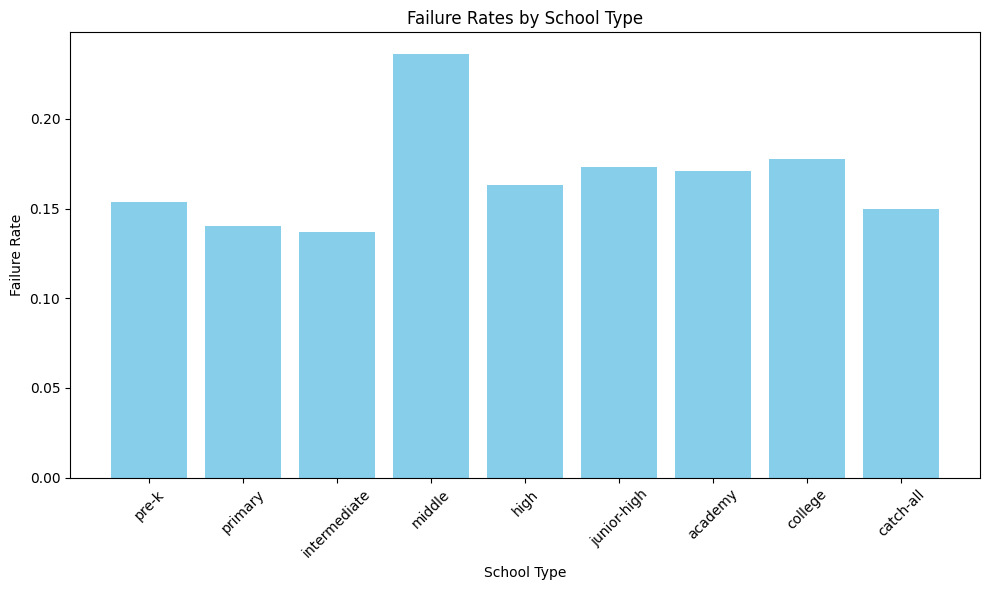

In [59]:
# Convert the dictionary to a DataFrame for easier plotting
failure_rates_df = pd.DataFrame(list(failure_rates.items()), columns=['School Type', 'Failure Rate'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(failure_rates_df['School Type'], failure_rates_df['Failure Rate'], color='skyblue')
plt.xlabel('School Type')
plt.ylabel('Failure Rate')
plt.title('Failure Rates by School Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
copy_df = df
for school, school_regex in schools.items():
    copy_df[school] = 0

    copy_df.loc[copy_df['project_school_name'].str.contains(school_regex), school] = 1

copy_df['other'] = copy_df.apply(lambda row: 1 if all(row[school] == 0 for school in schools) else 0, axis=1)

copy_df.head()

,project_building_identifier,project_school_name,project_geographic_district,project_status_name,failure,manhattan,bronx,brooklyn,queens,staten-island,other,pre-k,primary,intermediate,middle,high,junior-high,academy,college
0,X254,I.S. 254 - BRONX,10,In-Progress,False,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,X254,I.S. 254 - BRONX,10,In-Progress,False,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,X254,I.S. 254 - BRONX,10,Complete,False,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,X254,I.S. 254 - BRONX,10,In-Progress,True,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,X254,I.S. 254 - BRONX,10,PNS,False,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [115]:
for school in list(schools.keys()) + ['other']:
    print(school)
    print(copy_df['failure'].corr(copy_df[school]))

pre-k
0.0017997397297016405
primary
-0.020831699418805753
intermediate
-0.01586523471005754
middle
0.04381925387076778
high
0.021312975529891514
junior-high
0.010018852458198809
academy
0.012578898215575243
college
0.009053899593701195
other
0.002147654170028642


In [211]:
boroughs = {
    'manhattan': 'MANHATTAN|MANHATT',
    'bronx': 'BRONX',
    'brooklyn': 'BROOKLYN',
    'queens': 'QUEENS',
    'staten-island': 'STATEN ISLAND'
}

for borough_type, borough in boroughs.items():
    print(borough_type)
    print(len(df[df['project_school_name'].str.contains(borough)]))


manhattan
999
bronx
1107
brooklyn
2260
queens
1665
staten-island
500


In [52]:
# Find all rows that don't match any of the regexes
filtered_df = df
for borough_type, borough in boroughs.items():
    filtered_df = filtered_df[~filtered_df['project_school_name'].str.contains(borough)]

print(len(filtered_df))
# filtered_df;

1654


In [212]:
# Assuming 'df' is your DataFrame and 'boroughs' is defined as above
failure_rates = {}
categorized_indices = set()

for borough_type, borough in boroughs.items():
    # Filter the DataFrame for each borough type
    borough_df = df[df['project_school_name'].str.contains(borough, na=False, case=False)]
    
    # Track categorized indices
    categorized_indices.update(borough_df.index)
    
    # Calculate the failure rate
    if len(borough_df) > 0:
        failure_rate = borough_df['failure'].mean()
    else:
        failure_rate = 0
    
    # Store the result in the dictionary
    failure_rates[borough_type] = failure_rate

# Calculate failure rate for the catch-all category
remaining_df = df.drop(index=categorized_indices)
if len(remaining_df) > 0:
    catch_all_failure_rate = remaining_df['failure'].mean()
else:
    catch_all_failure_rate = 0

print(len(remaining_df))

# Add catch-all category to the dictionary
failure_rates['catch-all'] = catch_all_failure_rate

# Print the failure rates
print(failure_rates)

1654
{'manhattan': 0.15615615615615616, 'bronx': 0.11833785004516711, 'brooklyn': 0.14513274336283186, 'queens': 0.13033033033033034, 'staten-island': 0.106, 'catch-all': 0.19407496977025393}


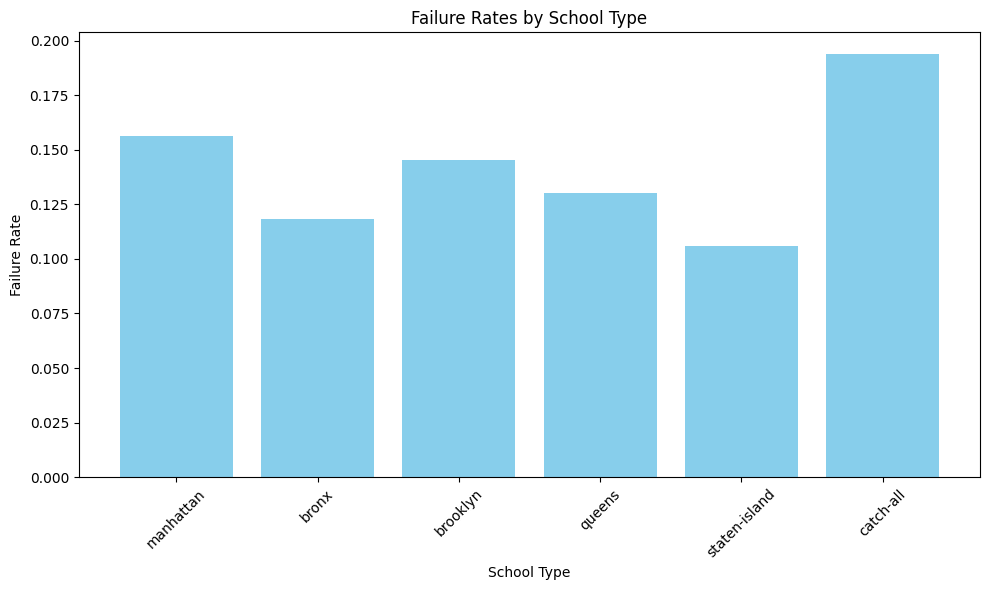

In [128]:
# Convert the dictionary to a DataFrame for easier plotting
failure_rates_df = pd.DataFrame(list(failure_rates.items()), columns=['School Type', 'Failure Rate'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(failure_rates_df['School Type'], failure_rates_df['Failure Rate'], color='skyblue')
plt.xlabel('School Type')
plt.ylabel('Failure Rate')
plt.title('Failure Rates by School Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [112]:
copy_df = df
for borough, borough_regex in boroughs.items():
    copy_df[borough] = 0

    copy_df.loc[copy_df['project_school_name'].str.contains(borough_regex), borough] = 1

copy_df['other'] = copy_df.apply(lambda row: 1 if all(row[borough] == 0 for borough in boroughs) else 0, axis=1)

copy_df.head()

,project_building_identifier,project_school_name,project_geographic_district,project_status_name,failure,manhattan,bronx,brooklyn,queens,staten-island,other
0,X254,I.S. 254 - BRONX,10,In-Progress,False,0,1,0,0,0,0
1,X254,I.S. 254 - BRONX,10,In-Progress,False,0,1,0,0,0,0
2,X254,I.S. 254 - BRONX,10,Complete,False,0,1,0,0,0,0
3,X254,I.S. 254 - BRONX,10,In-Progress,True,0,1,0,0,0,0
4,X254,I.S. 254 - BRONX,10,PNS,False,0,1,0,0,0,0


In [113]:
for borough in list(boroughs.keys()) + ['other']:
    print(borough)
    print(copy_df['failure'].corr(copy_df[borough]))

manhattan
0.009271154398912755
bronx
-0.03236216635756291
brooklyn
-0.0038507226291600244
queens
-0.024254736698482708
staten-island
-0.02975160048985073
other
0.06635034966248796


In [109]:
regex = '[0-9]+.* - [A-Z]+'
format_schools = df[df['project_school_name'].str.contains(regex, na=False, case=False)]
unformat_schools = df[~df['project_school_name'].str.contains(regex, na=False, case=False)]

In [110]:
format_schools['failure'].mean()

0.1354714335786891

In [111]:
unformat_schools['failure'].mean()

0.17466720451795079

In [116]:
df['is_formatted'] = df['project_school_name'].str.contains(regex, na=False, case=False)
# format_schools = df[df['project_school_name'].str.contains(regex, na=False, case=False)]


In [118]:
df['failure'].corr(df['is_formatted'], method='spearman')

-0.05081279741751702

# project_geographic_district

see: https://teachnyc.zendesk.com/hc/en-us/articles/360043956952-How-is-NYC-divided-into-school-districts

https://data.nysed.gov/profile.php?instid=7889678368

In [119]:
df['project_status_name'].value_counts()

project_status_name
PNS            3046
Complete       2981
In-Progress    2158
Name: count, dtype: int64

In [121]:
dfs = {}

for status in df['project_status_name'].unique():
    dfs[status] = df[df['project_status_name'] == status]

In [123]:
df['project_geographic_district'].value_counts()

project_geographic_district
31    619
2     424
22    355
10    350
27    338
28    326
21    320
15    305
24    304
3     283
20    277
6     274
25    264
30    258
26    250
9     246
19    236
11    235
18    234
8     234
29    229
13    221
17    207
14    200
32    175
23    171
5     157
12    156
4     146
16    145
7     141
1     105
Name: count, dtype: int64

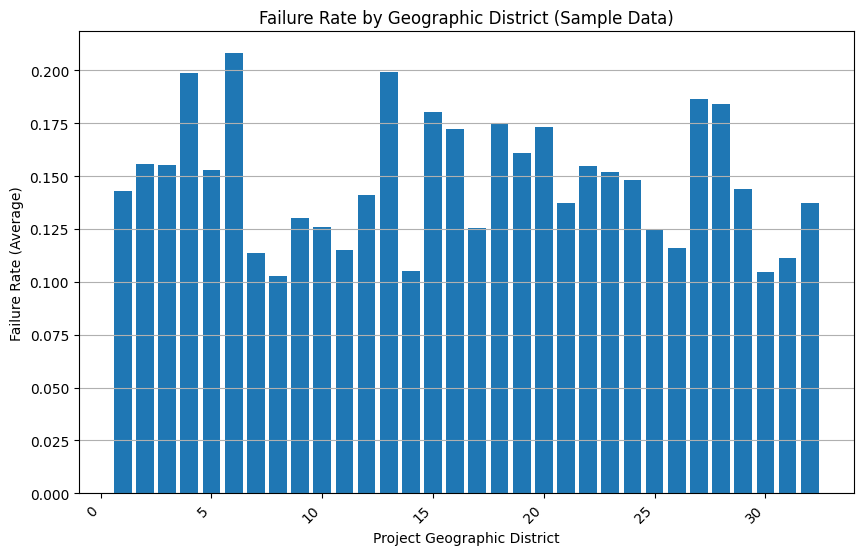

In [125]:
# Calculate failure rate per district (assuming number of projects per district is same)
failure_rate = df.groupby('project_geographic_district')['failure'].mean()

# Configure plot
plt.figure(figsize=(10, 6))
plt.bar(failure_rate.index, failure_rate.values)
plt.xlabel('Project Geographic District')
plt.ylabel('Failure Rate (Average)')
plt.title('Failure Rate by Geographic District (Sample Data)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for long district names
plt.grid(axis='y')  # Add grid lines on the y-axis

# Customize plot (optional)
# plt.ylim(0, 1.1)  # Set y-axis limits (adjust based on your data)

plt.show()

TODO:
- project building identifier
- investigate thesis of poor vs funding / other stuff
- confirm that districts are what I think they are

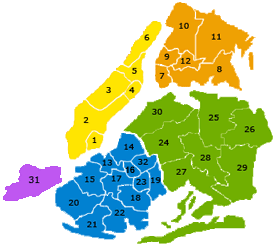

In [143]:
borough_districts = {
    'manhattan': [i for i in range(1, 7)],
    'bronx': [i for i in range(7, 13)], 
    'brooklyn': [i for i in range(13, 24)] + [32],
    'queens': [i for i in range(24, 31)],
    'staten-island': [31]
}

for borough, districts in borough_districts.items():
    print(borough)
    print(len(df[df['project_geographic_district'].isin(districts)]))
    print(df[df['project_geographic_district'].isin(districts)]['failure'].mean())

manhattan
1389
0.16918646508279336
bronx
1362
0.1211453744493392
brooklyn
2846
0.15706254392129304
queens
1969
0.14728288471305231
staten-island
619
0.11147011308562198


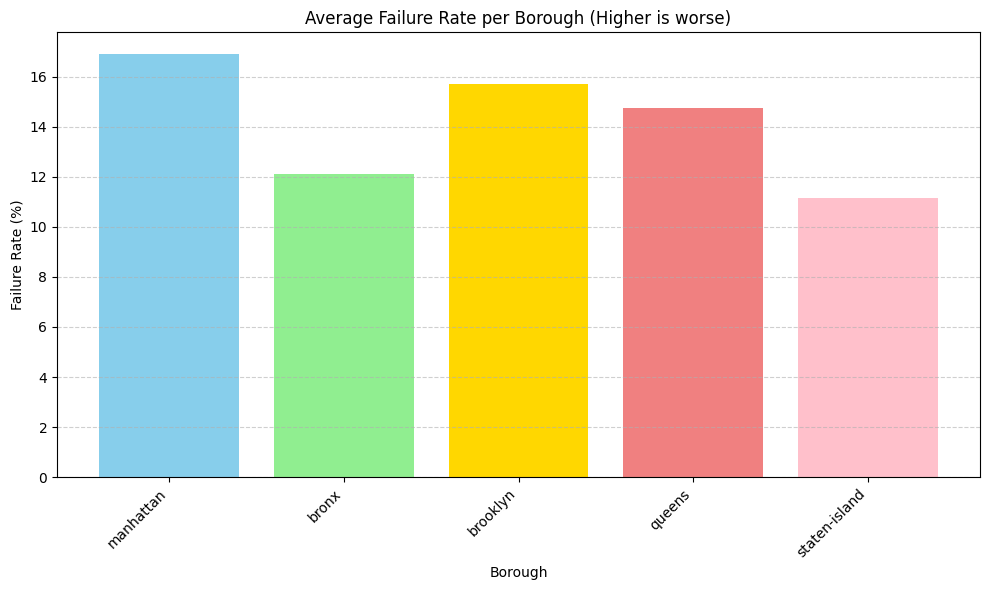

In [144]:
# Assuming your DataFrame is named 'df'
failure_rates = {}
for borough, districts in borough_districts.items():
    failure_rates[borough] = df[df['project_geographic_district'].isin(districts)]['failure'].mean()

# Create a bar chart
boroughs = list(failure_rates.keys())
failure_percentages = [round(value * 100, 2) for value in failure_rates.values()]  # Convert decimals to percentages

plt.figure(figsize=(10, 6))
plt.bar(boroughs, failure_percentages, color=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'pink'])
plt.xlabel('Borough')
plt.ylabel('Failure Rate (%)')
plt.title('Average Failure Rate per Borough (Higher is worse)')
plt.xticks(rotation=45, ha='right')  # Rotate borough labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint gridlines

plt.tight_layout()
plt.show()

investigating poverty

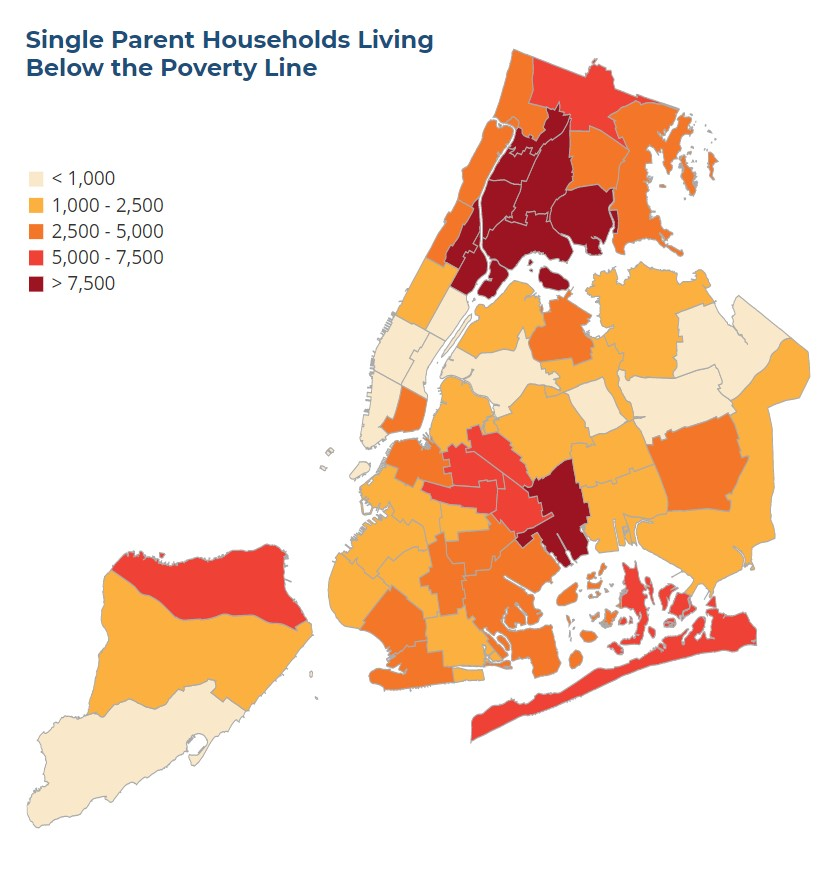

In [145]:
df_tot = pd.read_csv("https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv")
df_tot = df_tot.drop(columns=['Unnamed: 0'])

In [146]:
df_tot.columns

Index(['project_geographic_district', 'project_building_identifier',
       'project_school_name', 'project_type', 'project_description',
       'project_phase_name', 'project_status_name',
       'project_phase_actual_start_date', 'project_phase_planned_end_date',
       'project_phase_actual_end_date', 'project_budget_amount',
       'final_estimate_of_actual_costs_through_end_of_phase_amount',
       'total_phase_actual_spending_amount', 'dsf_number_s', 'failure'],
      dtype='object')

In [147]:
df_tot[df_tot['project_geographic_district'].isin(borough_districts['bronx'])]['final_estimate_of_actual_costs_through_end_of_phase_amount'].describe()

count    1.359000e+03
mean     1.146035e+06
std      5.539848e+06
min      0.000000e+00
25%      2.700000e+04
50%      7.944100e+04
75%      2.834620e+05
max      8.587492e+07
Name: final_estimate_of_actual_costs_through_end_of_phase_amount, dtype: float64

In [148]:
df_tot[df_tot['project_geographic_district'].isin(borough_districts['manhattan'])]['final_estimate_of_actual_costs_through_end_of_phase_amount'].describe()

count    1.389000e+03
mean     8.674236e+05
std      5.070408e+06
min      0.000000e+00
25%      1.300700e+04
50%      7.040000e+04
75%      2.378880e+05
max      1.150066e+08
Name: final_estimate_of_actual_costs_through_end_of_phase_amount, dtype: float64

In [149]:
df_tot[df_tot['project_geographic_district'].isin(borough_districts['manhattan'])]['final_estimate_of_actual_costs_through_end_of_phase_amount'].describe()

count    1.389000e+03
mean     8.674236e+05
std      5.070408e+06
min      0.000000e+00
25%      1.300700e+04
50%      7.040000e+04
75%      2.378880e+05
max      1.150066e+08
Name: final_estimate_of_actual_costs_through_end_of_phase_amount, dtype: float64

In [150]:
df_tot['final_estimate_of_actual_costs_through_end_of_phase_amount'].describe()

count    8.181000e+03
mean     1.185590e+06
std      6.300406e+06
min      0.000000e+00
25%      1.841900e+04
50%      8.030900e+04
75%      2.640000e+05
max      1.150066e+08
Name: final_estimate_of_actual_costs_through_end_of_phase_amount, dtype: float64

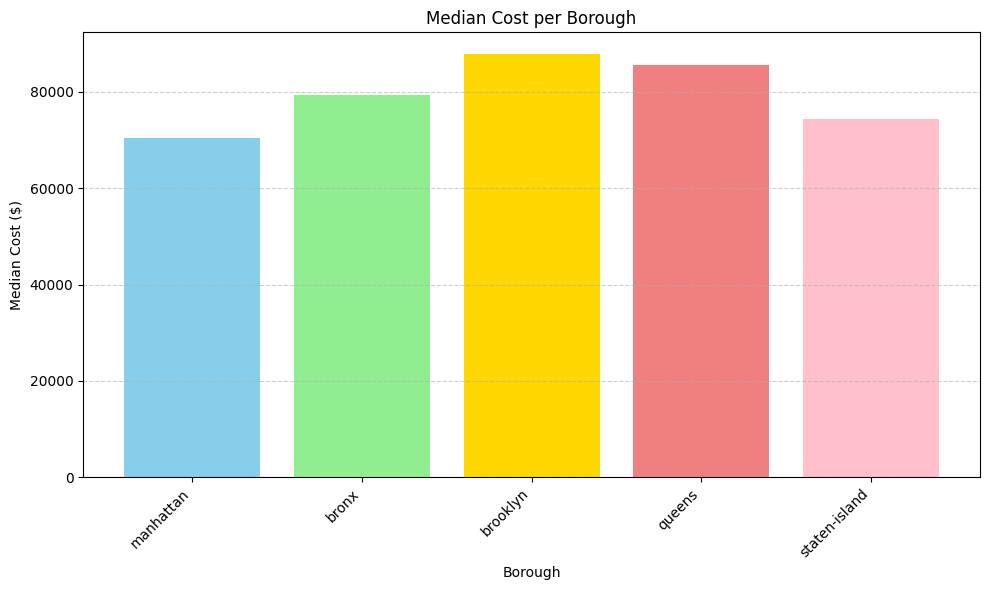

In [177]:
# graph medians of each borough
borough_medians = {}

for borough, districts in borough_districts.items():
    borough_medians[borough] = df_tot[df_tot['project_geographic_district'].isin(districts)]['final_estimate_of_actual_costs_through_end_of_phase_amount'].median()

boroughs = list(borough_medians.keys())
medians = [value for value in borough_medians.values()]

plt.figure(figsize=(10, 6))
plt.bar(boroughs, medians, color=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'pink'])
plt.xlabel('Borough')
plt.ylabel('Median Cost ($)')
plt.title('Median Cost per Borough')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [151]:
df_tot['final_estimate_of_actual_costs_through_end_of_phase_amount'].corr(df_tot['failure'])

-0.06717756110379669

In [154]:
df_tot[df_tot['project_geographic_district'].isin(borough_districts['bronx'])]['project_type'].value_counts()

project_type
SCA CIP                 556
SCA CIP RESOA           368
SCA IEH                 159
DIIT - RESOA             68
DOE - Skilled Trades     57
SCA Capacity             36
DIIT - Project Conne     26
Trust For Public Lan     23
DOE - Lead Paint         23
DOE- RESOA               20
SCA Furniture & Equi     11
Fast Track Projects       5
PRE-K                     4
DIIT - PBX Telephone      4
RCT CIP                   1
SCA Emergency Respon      1
Name: count, dtype: int64

In [155]:
df_tot[df_tot['project_geographic_district'].isin(borough_districts['manhattan'])]['project_type'].value_counts()

project_type
SCA CIP RESOA           596
SCA CIP                 384
SCA IEH                 103
DIIT - RESOA             54
DOE - Skilled Trades     50
DOE- RESOA               46
DIIT - Project Conne     43
Trust For Public Lan     24
Fast Track Projects      19
DOE - Lead Paint         15
SCA Capacity             12
SCA Lease Site Impro     12
SCA Emergency Lighti     12
PRE-K                     8
SCA Furniture & Equi      5
DIIT - PBX Telephone      5
DCAS/NYPA                 1
Name: count, dtype: int64

building number

In [161]:
df['project_building_identifier'].apply(lambda x: x[0]).unique()

array(['X', 'M', 'Q', 'K', 'R'], dtype=object)

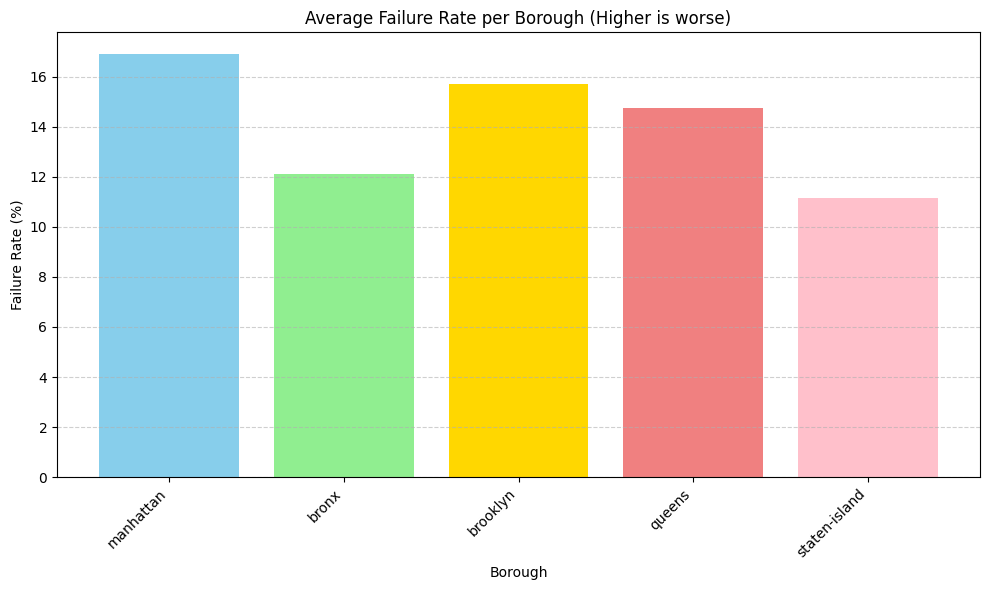

In [162]:
borough_to_building = {
    'manhattan': ['M'],
    'bronx': ['X'],
    'brooklyn': ['K'],
    'queens': ['Q'],
    'staten-island': ['R']
}

failure_rates = {}
for borough, buildings in borough_to_building.items():
    failure_rates[borough] = df[df['project_building_identifier'].apply(lambda x: x[0] in buildings)]['failure'].mean()

# Create a bar chart
boroughs = list(failure_rates.keys())
failure_percentages = [round(value * 100, 2) for value in failure_rates.values()]  # Convert decimals to percentages

plt.figure(figsize=(10, 6))
plt.bar(boroughs, failure_percentages, color=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'pink'])
plt.xlabel('Borough')
plt.ylabel('Failure Rate (%)')
plt.title('Average Failure Rate per Borough (Higher is worse)')
plt.xticks(rotation=45, ha='right')  # Rotate borough labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint gridlines

plt.tight_layout()
plt.show()

In [175]:
# Only have numbers
nums = df['project_building_identifier'].apply(lambda x: x[1:]).apply(lambda x: int(x) if x.isnumeric() else None)

# Filter out Nones
nums = nums.dropna()
len(nums)

8165

In [176]:
nums.corr(df['failure'])

0.023814451039725827

In [178]:
df_bronx = df_tot[df_tot['project_geographic_district'].isin(borough_districts['bronx'])]

In [182]:
def convert_to_datetime(value):
    if value == 'PNS':
        return value
    try:
        return pd.to_datetime(value)
    except ValueError:
        print(value)
        return value

df_tot['project_phase_actual_start_date'] = df_tot['project_phase_actual_start_date'].apply(convert_to_datetime)

FTK


In [183]:
not_pns = df_tot[~df_tot['project_phase_actual_start_date'].isin(['PNS', 'FTK'])]

/tmp/ipykernel_29588/2399253849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_pns['project_phase_actual_start_date'] = pd.to_datetime(not_pns['project_phase_actual_start_date'])


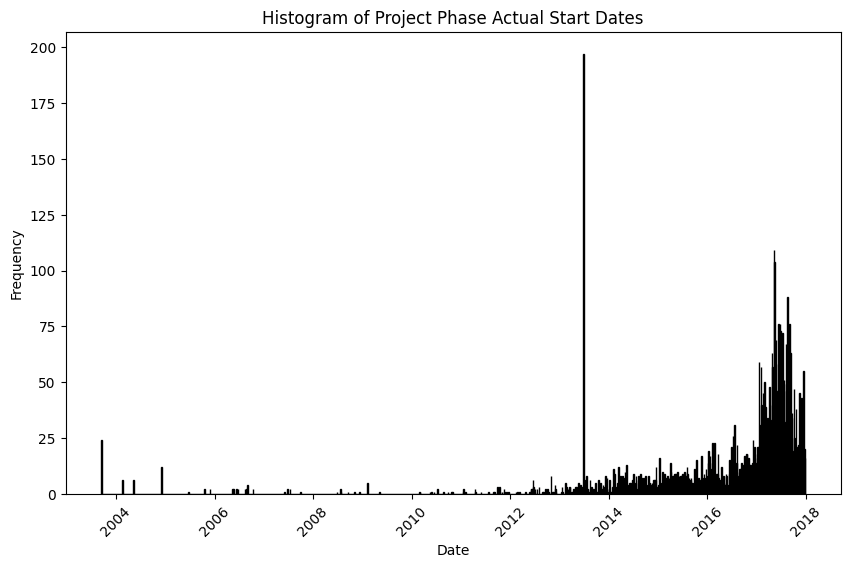

In [184]:
# Convert 'project_phase_actual_start_date' to datetime
not_pns['project_phase_actual_start_date'] = pd.to_datetime(not_pns['project_phase_actual_start_date'])

# Plotting histogram with dates
plt.figure(figsize=(10, 6))
plt.hist(not_pns['project_phase_actual_start_date'], bins=len(not_pns['project_phase_actual_start_date'].unique()), edgecolor='black')

plt.title('Histogram of Project Phase Actual Start Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_29588/3990138246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['project_phase_actual_start_date'] = pd.to_datetime(recent['project_phase_actual_start_date'])


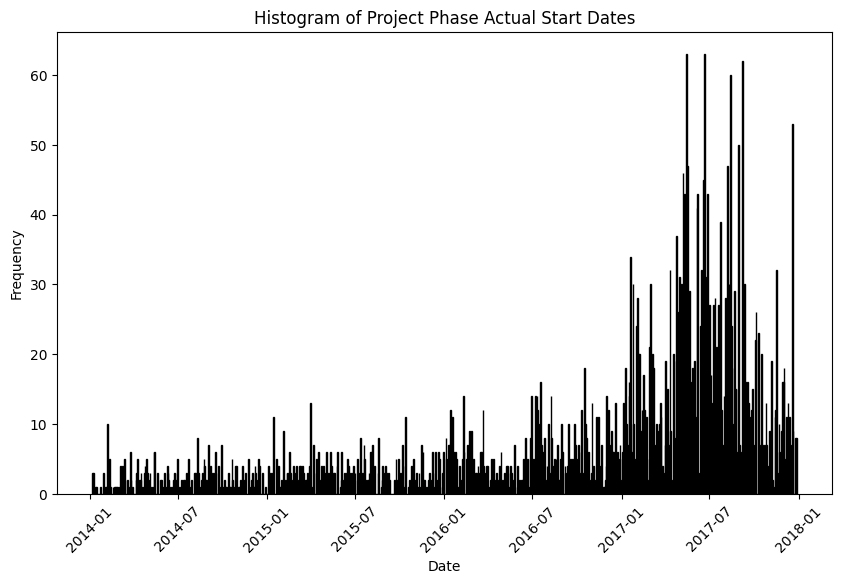

In [185]:
recent = not_pns[not_pns['project_phase_actual_start_date'] > '2014-01-01']

# Convert 'project_phase_actual_start_date' to datetime
recent['project_phase_actual_start_date'] = pd.to_datetime(recent['project_phase_actual_start_date'])

# Plotting histogram with dates
plt.figure(figsize=(10, 6))
plt.hist(recent['project_phase_actual_start_date'], bins=len(recent['project_phase_actual_start_date'].unique()), edgecolor='black')

plt.title('Histogram of Project Phase Actual Start Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

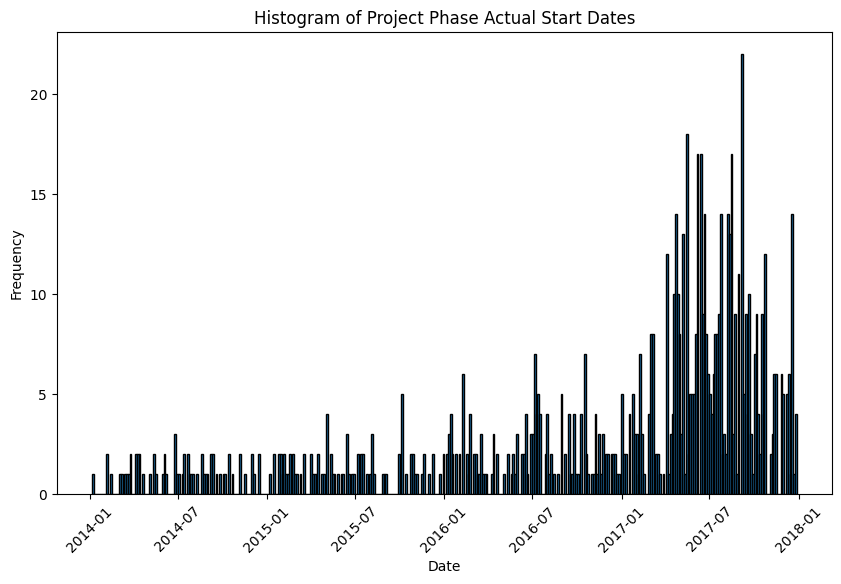

In [188]:
# Convert 'project_phase_actual_start_date' to datetime
df_bronx = not_pns[not_pns['project_geographic_district'].isin(borough_districts['bronx'])]
df_bronx = df_bronx[df_bronx['project_phase_actual_start_date'] > '2014-01-01']

# Plotting histogram with dates
plt.figure(figsize=(10, 6))
plt.hist(df_bronx['project_phase_actual_start_date'], bins=len(df_bronx['project_phase_actual_start_date'].unique()), edgecolor='black')

plt.title('Histogram of Project Phase Actual Start Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

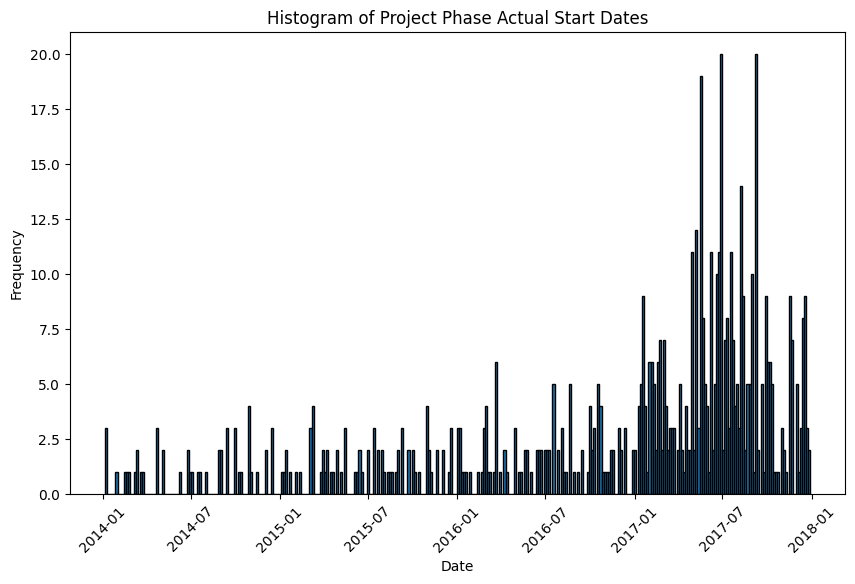

In [189]:
# Convert 'project_phase_actual_start_date' to datetime
df_manhattan = not_pns[not_pns['project_geographic_district'].isin(borough_districts['manhattan'])]

df_manhattan = df_manhattan[df_manhattan['project_phase_actual_start_date'] > '2014-01-01']

# Plotting histogram with dates
plt.figure(figsize=(10, 6))
plt.hist(df_manhattan['project_phase_actual_start_date'], bins=len(df_manhattan['project_phase_actual_start_date'].unique()), edgecolor='black')

plt.title('Histogram of Project Phase Actual Start Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

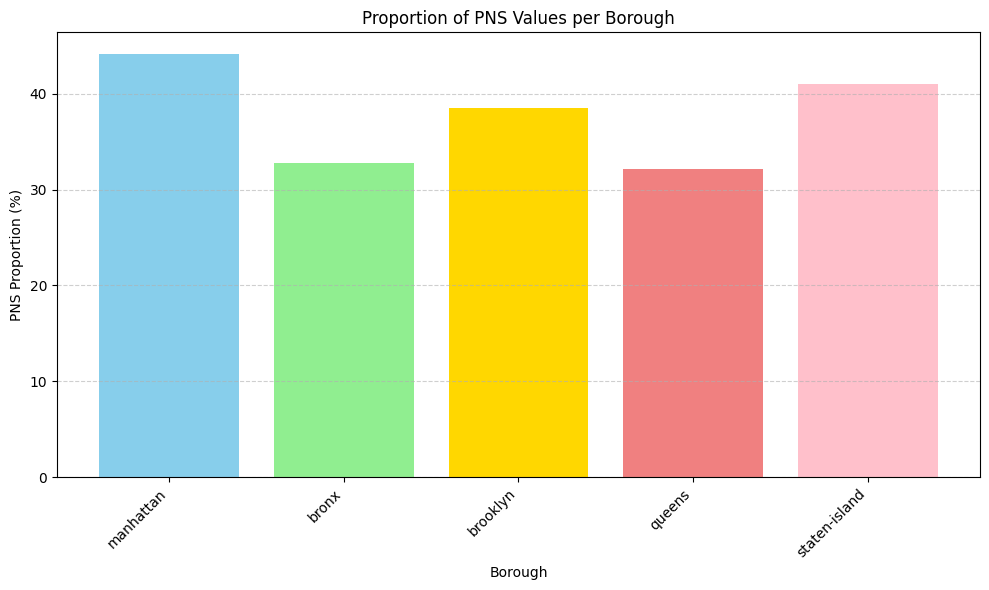

In [201]:
# Compute proportion of PNS values for each borough

pns_proportions = {}

for borough, districts in borough_districts.items():
    borough_df = df_tot[df_tot['project_geographic_district'].isin(districts)]
    pns_proportions[borough] = (borough_df['project_status_name'] == 'PNS').mean()

# Create a bar chart
boroughs = list(pns_proportions.keys())
proportions = [round(value * 100, 2) for value in pns_proportions.values()]  # Convert decimals to percentages

plt.figure(figsize=(10, 6))
plt.bar(boroughs, proportions, color=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'pink'])
plt.xlabel('Borough')
plt.ylabel('PNS Proportion (%)')
plt.title('Proportion of PNS Values per Borough')
plt.xticks(rotation=45, ha='right')  # Rotate borough labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint gridlines

plt.tight_layout()
plt.show()

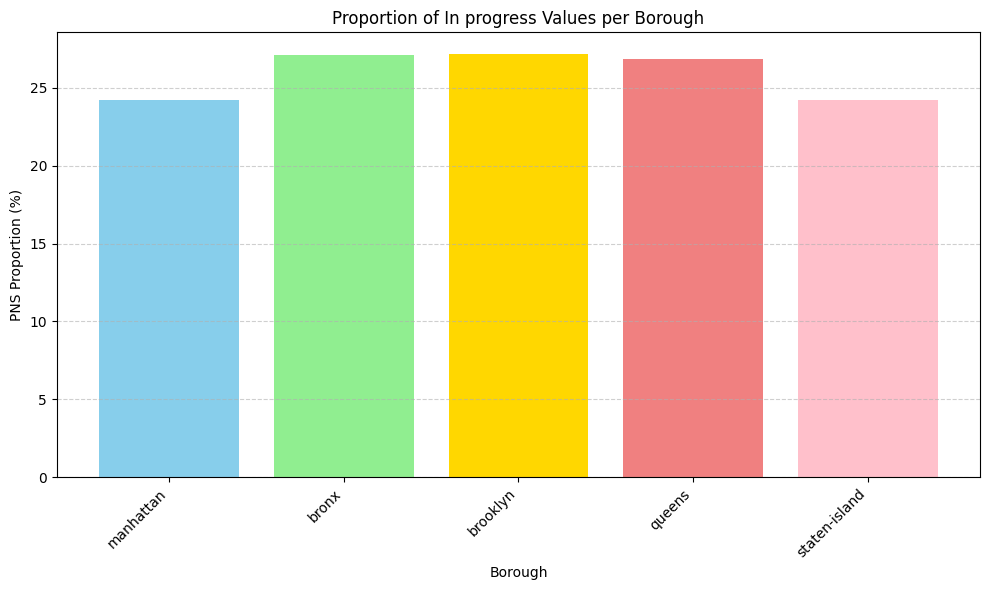

In [214]:
# Compute proportion of PNS values for each borough

pns_proportions = {}

for borough, districts in borough_districts.items():
    borough_df = df_tot[df_tot['project_geographic_district'].isin(districts)]
    pns_proportions[borough] = (borough_df['project_status_name'] == 'In-Progress').mean()

# Create a bar chart
boroughs = list(pns_proportions.keys())
proportions = [round(value * 100, 2) for value in pns_proportions.values()]  # Convert decimals to percentages

plt.figure(figsize=(10, 6))
plt.bar(boroughs, proportions, color=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'pink'])
plt.xlabel('Borough')
plt.ylabel('PNS Proportion (%)')
plt.title('Proportion of In progress Values per Borough')
plt.xticks(rotation=45, ha='right')  # Rotate borough labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint gridlines

plt.tight_layout()
plt.show()

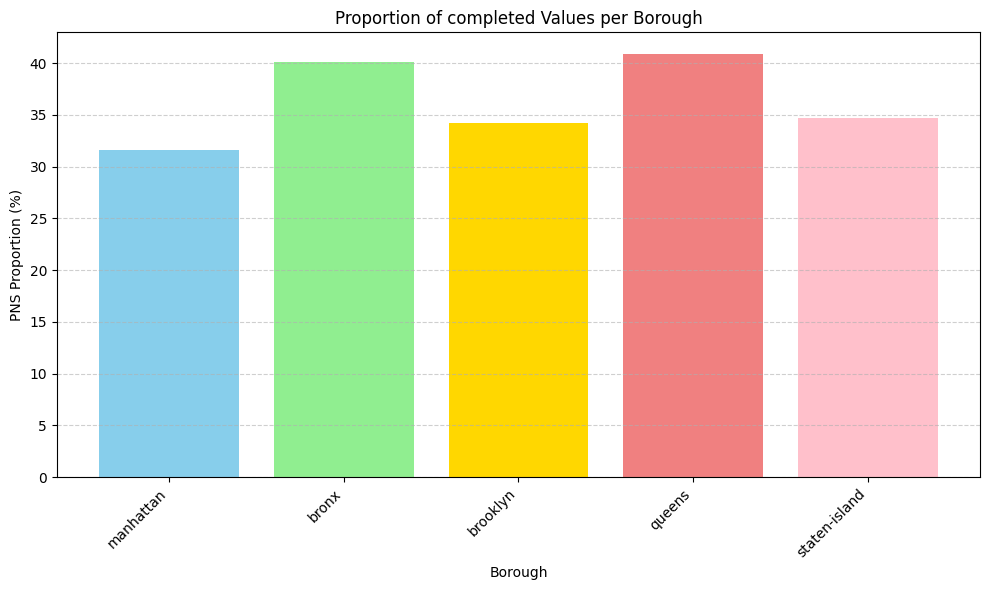

In [215]:
# Compute proportion of PNS values for each borough

pns_proportions = {}

for borough, districts in borough_districts.items():
    borough_df = df_tot[df_tot['project_geographic_district'].isin(districts)]
    pns_proportions[borough] = (borough_df['project_status_name'] == 'Complete').mean()

# Create a bar chart
boroughs = list(pns_proportions.keys())
proportions = [round(value * 100, 2) for value in pns_proportions.values()]  # Convert decimals to percentages

plt.figure(figsize=(10, 6))
plt.bar(boroughs, proportions, color=['skyblue', 'lightgreen', 'gold', 'lightcoral', 'pink'])
plt.xlabel('Borough')
plt.ylabel('PNS Proportion (%)')
plt.title('Proportion of completed Values per Borough')
plt.xticks(rotation=45, ha='right')  # Rotate borough labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add faint gridlines

plt.tight_layout()
plt.show()

In [207]:
# Bronx projects that are pns
df_bronx = df_tot[df_tot['project_geographic_district'].isin(borough_districts['bronx'])]

statuses = ['PNS', 'In-Progress', 'Complete']

for status in statuses:
    print(status)
    print(len(df_bronx[df_bronx['project_status_name'] == status]))
    print(df_bronx[df_bronx['project_status_name'] == status]['failure'].mean())

PNS
447
0.09619686800894854
In-Progress
369
0.25474254742547425
Complete
546
0.05128205128205128


In [208]:
# Bronx projects that are pns
df_manhattan = df_tot[df_tot['project_geographic_district'].isin(borough_districts['manhattan'])]

statuses = ['PNS', 'In-Progress', 'Complete']

for status in statuses:
    print(status)
    print(len(df_manhattan[df_manhattan['project_status_name'] == status]))
    print(df_manhattan[df_manhattan['project_status_name'] == status]['failure'].mean())

PNS
614
0.1563517915309446
In-Progress
336
0.31845238095238093
Complete
439
0.07289293849658314


In [213]:
for status in statuses:
    print(status)
    print(len(df_tot[df_tot['project_status_name'] == status]))
    print(df_tot[df_tot['project_status_name'] == status]['failure'].mean())

PNS
3046
0.13427445830597504
In-Progress
2158
0.27293790546802593
Complete
2981
0.06977524320697752


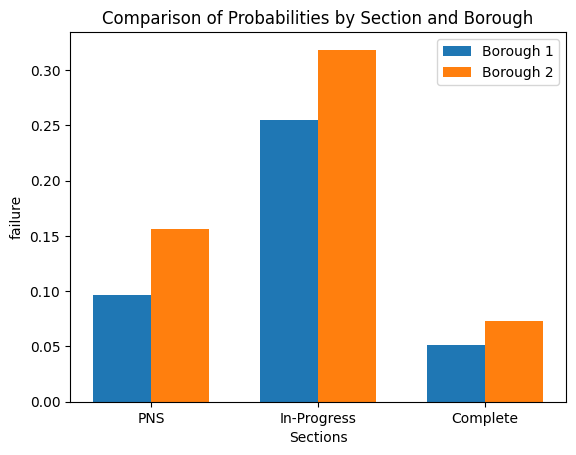

In [219]:
# Labels for the sections
labels = ['PNS', 'In-Progress', 'Complete']

# Probabilities for each borough
borough_1 = [0.09619686800894854, 0.25474254742547425, 0.05128205128205128]
borough_2 = [0.1563517915309446, 0.31845238095238093, 0.07289293849658314]

# Number of bars per group
n_groups = len(labels)

# Create a figure and an axis
fig, ax = plt.subplots()

# Define the bar width
bar_width = 0.35

# Define the positions of the bars
index = np.arange(n_groups)

# Create the bars for borough 1
bar1 = ax.bar(index, borough_1, bar_width, label='Borough 1')

# Create the bars for borough 2
bar2 = ax.bar(index + bar_width, borough_2, bar_width, label='Borough 2')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Sections')
ax.set_ylabel('failure')
ax.set_title('Comparison of Probabilities by Section and Borough')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Add a legend
ax.legend()

# Display the plot
plt.show()